In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
boroughs = gpd.read_file('boroughboundaries.shp')
boroughs

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2.0,Bronx,1.186612e+09,462958.188213,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
1,5.0,Staten Island,1.623756e+09,325960.634597,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,3.0,Brooklyn,1.937593e+09,738745.835869,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,4.0,Queens,3.045885e+09,904390.137335,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
4,1.0,Manhattan,6.366027e+08,361212.479734,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."


In [5]:
for index in boroughs.index:
    polygons = boroughs.loc[index, 'geometry']
    print(index, polygons.bounds)

0 (-73.93360592036706, 40.78535662050845, -73.7653324399529, 40.91553277599955)
1 (-74.25559136249367, 40.496115395170854, -74.04923629842045, 40.64892555177345)
2 (-74.0418964317642, 40.56952999448672, -73.83355923814374, 40.73912795313436)
3 (-73.96262015898662, 40.54183396045305, -73.70000906255197, 40.80101146781899)
4 (-74.04772962763064, 40.68291694544512, -73.90665099473267, 40.87903804730722)


In [80]:
man_poly = boroughs.loc[4, 'geometry']
man_poly.bounds

(-74.04772962763064, 40.68291694544512, -73.90665099473267, 40.87903804730722)

In [81]:
minx = round(man_poly.bounds[0], 3) - .001
miny = round(man_poly.bounds[1], 3) - .001
maxx = round(man_poly.bounds[2], 3) + .001
maxy = round(man_poly.bounds[3], 3) + .001

n_lats = (maxy-miny)/.001 +2
lats = np.linspace(miny, maxy, int(n_lats))
n_longs = (maxx - minx)/.001 +1
longs = np.linspace(minx, maxx, int(n_longs))

In [82]:
from itertools import product

In [83]:
lat_long_df = pd.DataFrame(product(lats, longs), columns=['latitude', 'longitude'])

In [84]:
geo_df = gpd.GeoDataFrame(lat_long_df,
                         geometry=gpd.points_from_xy(lat_long_df['longitude'], lat_long_df['latitude']))

In [85]:
geo_df['in_man'] = np.nan

In [86]:
man = boroughs.loc[4,'geometry']

In [92]:
# creating a polygon to reduce the load of checking points, esp if doing all of ny
# poly2 = 

"p5 = Point(-74.053, 40.688) #40.688310, -74.053245\n",
    "p6 = Point(-74.06, 40.688)\n",
    "p7 = Point(-74.06, 40.919)\n",
    "p8 = Point(-73.913, 40.919) #40.919607, -73.953894\n",
    "pointlist2 = [p5, p6, p7, p8]\n",
    "poly2 = gpd.GeoSeries(Polygon([[p.x, p.y] for p in pointlist2]))"
    
    
    "p1 = Point(-74.06, 40.659)\n",
    "p2 = Point(-74.270, 40.655)\n",
    "p3 = Point(-74.27, 40.914)\n",
    "p4 = Point(-74.831, 40.914)\n",
    "pointlist = [p1, p2, p3, p4]\n",
    "poly = gpd.GeoSeries(geometry.Polygon([[p.x, p.y] for p in pointList]))"

SyntaxError: invalid syntax (<ipython-input-92-7c5725aa416c>, line 2)

In [ ]:
# reducing the load of checking points for areas north of staten island
# geo_df.loc[((geo_df['latitude'] > 40.659) & (geo_df['longitude'] < -74.06)), 'in_nyc'] = False

#code for all boroughs

for df_index in range(40000, 60000):
    if df_index%500==0:
        print(df_index)
        if np.isnan(geo_df.loc[df_index, 'in_nyc']):
            geo_df.loc[df_index, 'in_nyc'] = False
            pt = gpd.GeoSeries(geo_df.loc[df_index, 'geometry'])
        if not pt.intersects(poly2).any():
            for b_index in boroughs.index:
                polygons = boroughs.loc[b_index, 'geometry']
                if pt.intersects(polygons).any():
                    geo_df.loc[df_index, 'in_nyc'] = True
                    break
geo_df[40000:60000].to_csv('geo_df_60k.csv')

In [66]:
pt = Point(-73.941368, 40.815709)
pt.intersects(man)

True

In [87]:
geo_df.shape

(28656, 4)

In [88]:
for index in range(geo_df.shape[0]): 
    if index%5000==0:
        print(index)
#     if np.isnan(geo_df.loc[df_index, 'in_man']): # updated col from 'in_nyc'
#     geo_df.loc[df_index, 'in_man'] = False
    pt = geo_df.loc[index, 'geometry']
    if pt.intersects(man):
        geo_df.loc[index, 'in_man'] = True
    else:
        geo_df.loc[index, 'in_man'] = False

0
5000
10000
15000
20000
25000


In [89]:
man_gdf = gpd.GeoDataFrame(geo_df.loc[geo_df['in_man']==True])
man_gdf.head()

,latitude,longitude,geometry,in_man
170,40.683,-74.023,POINT (-74.02300 40.68300),True
313,40.684,-74.024,POINT (-74.02400 40.68400),True
325,40.684,-74.012,POINT (-74.01200 40.68400),True
455,40.685,-74.026,POINT (-74.02600 40.68500),True
456,40.685,-74.025,POINT (-74.02500 40.68500),True


In [90]:
man_gdf.to_csv('man_lat_longs.csv')

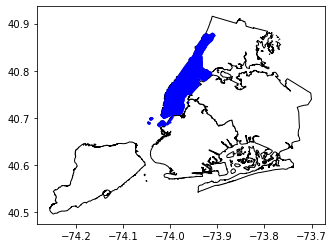

In [91]:
base = boroughs.plot(color='white', edgecolor='black')
man_gdf.plot(ax = base, marker = 'o', color='blue', markersize=1)

In [93]:
man_gdf.shape

(6312, 4)

In [3]:
import pandas as pd

In [13]:
man_pts = pd.read_csv('man_lat_longs.csv')

In [14]:
all_pts = man_pts.head(10)

In [16]:
all_pts.loc[:, 'on_path'] = True

//anaconda3/envs/geo-env/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
all_pts = all_pts.drop(columns=['Unnamed: 0', 'in_man'])

In [20]:
all_pts

,latitude,longitude,geometry,on_path
0,40.683,-74.023,POINT (-74.02300000000001 40.683),True
1,40.684,-74.024,POINT (-74.024 40.684),True
2,40.684,-74.012,POINT (-74.012 40.684),True
3,40.685,-74.026,POINT (-74.02600000000001 40.685),True
4,40.685,-74.025,POINT (-74.02500000000001 40.685),True
5,40.685,-74.024,POINT (-74.024 40.685),True
6,40.685,-74.023,POINT (-74.02300000000001 40.685),True
7,40.685,-74.022,POINT (-74.02200000000001 40.685),True
8,40.686,-74.026,POINT (-74.02600000000001 40.686),True
9,40.686,-74.025,POINT (-74.02500000000001 40.686),True


In [21]:
manhattan_pts = man_pts.loc[:, ['latitude', 'longitude', 'in_man']]

In [22]:
    all_pts = pd.merge(all_pts, manhattan_pts, 
                        on=['latitude', 'longitude'],
                        how='left')

In [23]:
all_pts

,latitude,longitude,geometry,on_path,in_man
0,40.683,-74.023,POINT (-74.02300000000001 40.683),True,True
1,40.684,-74.024,POINT (-74.024 40.684),True,True
2,40.684,-74.012,POINT (-74.012 40.684),True,True
3,40.685,-74.026,POINT (-74.02600000000001 40.685),True,True
4,40.685,-74.025,POINT (-74.02500000000001 40.685),True,True
5,40.685,-74.024,POINT (-74.024 40.685),True,True
6,40.685,-74.023,POINT (-74.02300000000001 40.685),True,True
7,40.685,-74.022,POINT (-74.02200000000001 40.685),True,True
8,40.686,-74.026,POINT (-74.02600000000001 40.686),True,True
9,40.686,-74.025,POINT (-74.02500000000001 40.686),True,True


In [24]:
pd.DataFrame(all_pts.loc[(all_pts['on_path']==True) 
                        & (all_pts['in_man']==True)])

,latitude,longitude,geometry,on_path,in_man
0,40.683,-74.023,POINT (-74.02300000000001 40.683),True,True
1,40.684,-74.024,POINT (-74.024 40.684),True,True
2,40.684,-74.012,POINT (-74.012 40.684),True,True
3,40.685,-74.026,POINT (-74.02600000000001 40.685),True,True
4,40.685,-74.025,POINT (-74.02500000000001 40.685),True,True
5,40.685,-74.024,POINT (-74.024 40.685),True,True
6,40.685,-74.023,POINT (-74.02300000000001 40.685),True,True
7,40.685,-74.022,POINT (-74.02200000000001 40.685),True,True
8,40.686,-74.026,POINT (-74.02600000000001 40.686),True,True
9,40.686,-74.025,POINT (-74.02500000000001 40.686),True,True


In [2]:
nyc_pts = pd.read_csv('ny_pts.csv')

In [3]:
nyc_pts.shape

(83429, 5)